In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Load the appearances dataset
df = pd.read_csv('data/appearances.csv')

# Load the episodes file
episodes_df = pd.read_csv('data/episodes.csv')

In [92]:
df_merged = pd.merge(df, episodes_df[['epid', 'epno']], on='epid', how='left')

In [104]:
# Set the seasons to analyze
seasons_to_analyze = [44, 45, 46]

<Figure size 1000x700 with 0 Axes>

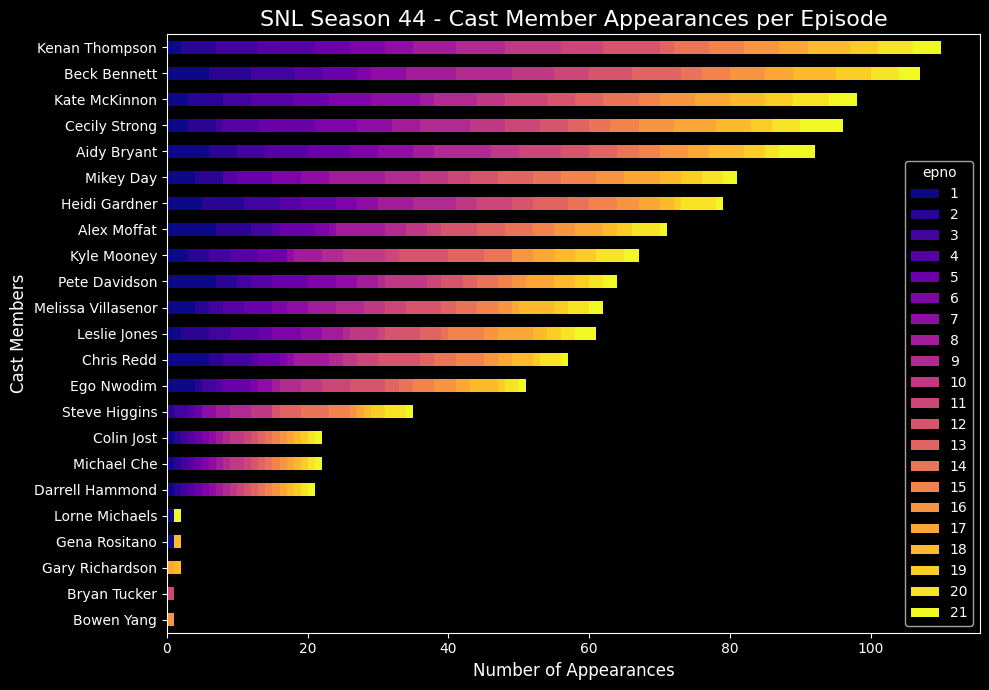

<Figure size 1000x700 with 0 Axes>

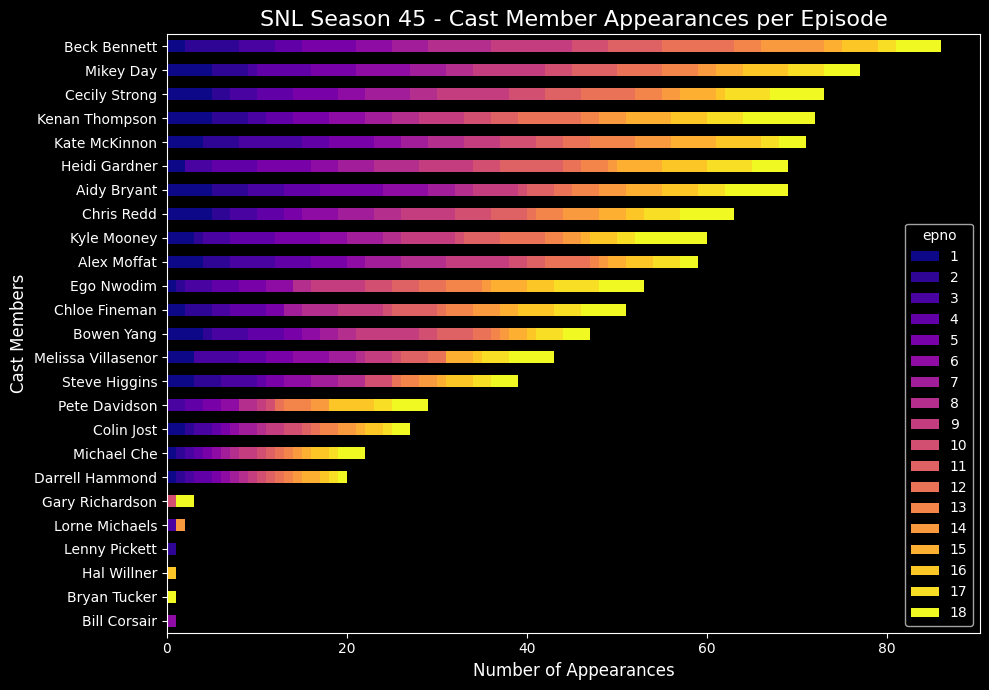

<Figure size 1000x700 with 0 Axes>

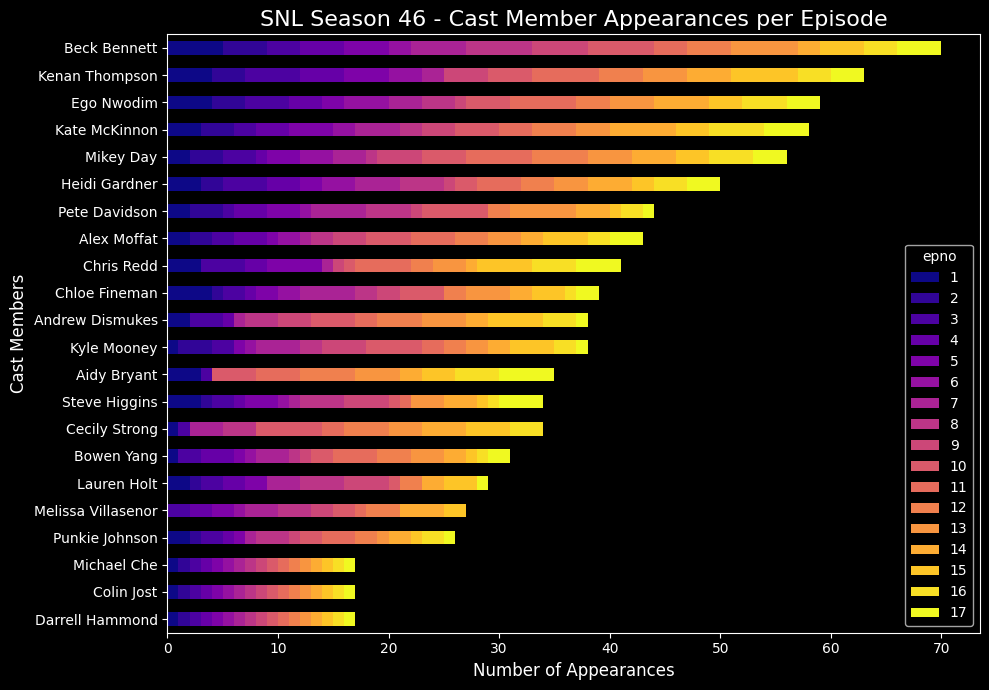

In [105]:
# Use a dark theme
plt.style.use('dark_background')

for season in seasons_to_analyze:
    # Filter the dataset for the selected season
    season_df = df_merged[df_merged['sid'] == season]

    # Filter for only cast members
    season_df = season_df[season_df['capacity'] == 'cast']

    # Count the number of appearances of each cast member in each episode
    cast_appearance_counts = season_df.groupby(['aid', 'epno']).size().reset_index(name='appearance_count')

    # Pivot the DataFrame so that 'epno' (episode number) becomes columns for stacking
    cast_pivot = cast_appearance_counts.pivot(index='aid', columns='epno', values='appearance_count').fillna(0)

    # Calculate total appearances for sorting
    cast_pivot['total_appearances'] = cast_pivot.sum(axis=1)

    # Sort cast members by total appearances in descending order
    cast_pivot = cast_pivot.sort_values(by='total_appearances', ascending=True)

    # Drop the 'total_appearances' column since it's not needed for plotting
    cast_pivot = cast_pivot.drop(columns=['total_appearances'])

    # Increase the height of the figure to make the y-axis longer
    plt.figure(figsize=(10, 7))  # Adjusted for a more vertical layout (height increased)

    ax = cast_pivot.plot(kind='barh', stacked=True, colormap='plasma', figsize=(10, 7))

    # Add title and labels
    plt.title(f"SNL Season {season} - Cast Member Appearances per Episode", fontsize=16, color='white')
    plt.ylabel("Cast Members", fontsize=12, color='white')  # y-axis is for cast members
    plt.xlabel("Number of Appearances", fontsize=12, color='white')  # x-axis is for number of appearances

    # Adjust layout to avoid clipping and make y-axis wider
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Save the plot as a PNG file
    # plt.savefig(f'images/season_{season}_summary.png', dpi=300, bbox_inches='tight')